<a href="https://colab.research.google.com/github/on-kulyashov/Code-for-NMR-course/blob/main/Spin2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

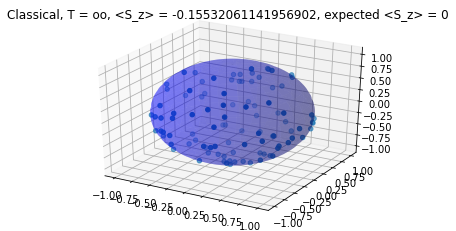

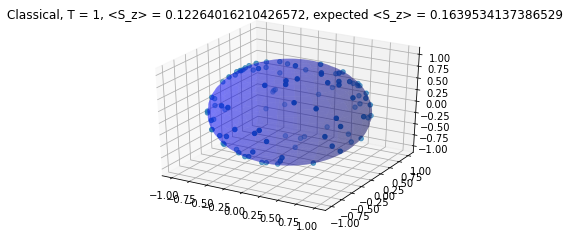

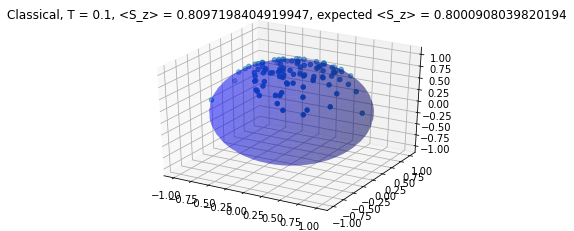

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from numpy.random import uniform

h = 0.01
# RK4 method    
def yn1(f, yn, xn, h):
    k1 = f(xn, yn)
    k2 = f(xn + h/2, yn + h*k1/2)
    k3 = f(xn + h/2, yn + h*k2/2)
    k4 = f(xn + h, yn + h*k3)
    return yn + h/6 * (k1 + 2*k2 + 2*k3 + k4)


def integrate(f, a, b, y_a, h):
    sol = [y_a]
    for i in range(int((b-a)//h) + 1):
        sol.append(yn1(f, sol[-1], a + i*h, h))
    return sol


def qnt(t, psi):
    return (-1/2) * np.matmul(hamiltonian, psi)


def Fcl_reverse(p, a):
    return np.arccos(np.log(2*p*np.sinh(a) + np.exp(-a)) / a) if a else np.arccos(2*p - 1)


def Fqt_reverse(p, a):
    if p < np.exp(a)/(np.exp(a) + np.exp(-a)):
        return 0
    return np.pi


def classical(n, a):
    if n:
        cl = classical(n-1, a)
        cl.append([2*np.pi*uniform(), Fcl_reverse(uniform(), a)])
        return cl
    return []


def classical_sz_exp(a):
    return 1 / np.tanh(a) - 1/a if a else 0


def quantum(n, a):
    if n:
        qt = quantum(n-1, a)
        qt.append([2*np.pi*uniform(), Fqt_reverse(uniform(), a)])
        return qt
    return []


def quantum_sz_exp(a):
    return np.tanh(a/2)


def spherical_to_cartesian(angles):
    theta = np.transpose(angles)[1]
    phi = np.transpose(angles)[0]
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    return [x, y, z]


def spherical_to_psi(angles):
    theta = np.transpose(angles)[1]
    phi = np.transpose(angles)[0]
    psi_0 = 


def evolve(a, b, psi):
    return integrate(qnt, a, b, psi, h)[-1]


H = np.array([0,0,1])
sigma = [np.array([[0,1],[1,0]]), np.array([[0, -1j],[1j, 0]]), np.array([[1, 0],[0, -1]])]
hamiltonian = np.tensordot(sigma, H, axes=([0],[0]))
n = 100
# Classical, T = oo
a = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
[sx, sy, sz] = spherical_to_cartesian(classical(n, a))
ax.scatter(sx, sy, sz)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b', alpha=0.3)
s_z = np.average(sz)
plt.title("Classical, T = oo, <S_z> = {}, expected <S_z> = {}".format(s_z, classical_sz_exp(a)))
plt.show()

# Classical, T = 1
a = 0.5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
[sx, sy, sz] = spherical_to_cartesian(classical(n, a))
ax.scatter(sx, sy, sz)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b', alpha=0.3)
s_z = np.average(sz)
plt.title("Classical, T = 1, <S_z> = {}, expected <S_z> = {}".format(s_z, classical_sz_exp(a)))
plt.show()

# Classical, T = 0.1
a = 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
[sx, sy, sz] = spherical_to_cartesian(classical(n, a))
ax.scatter(sx, sy, sz)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b', alpha=0.3)
s_z = np.average(sz)
plt.title("Classical, T = 0.1, <S_z> = {}, expected <S_z> = {}".format(s_z, classical_sz_exp(a)))
plt.show()

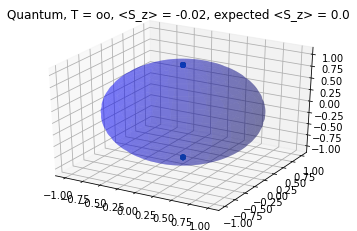

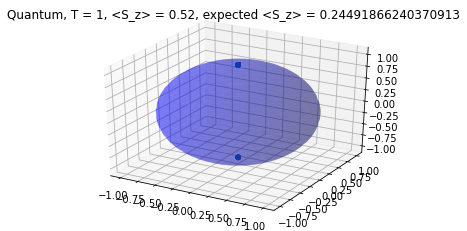

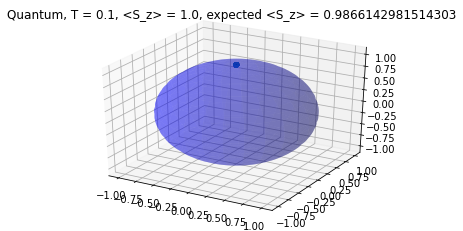

In [ ]:
# Quantum, T = oo
a = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
[sx, sy, sz] = spherical_to_cartesian(quantum(n, a))
ax.scatter(sx, sy, sz)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b', alpha=0.3)
s_z = np.average(sz)
plt.title("Quantum, T = oo, <S_z> = {}, expected <S_z> = {}".format(s_z, quantum_sz_exp(a)))
plt.show()

# Quantum, T = 1
a = 0.5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
[sx, sy, sz] = spherical_to_cartesian(quantum(n, a))
ax.scatter(sx, sy, sz)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b', alpha=0.3)
s_z = np.average(sz)
plt.title("Quantum, T = 1, <S_z> = {}, expected <S_z> = {}".format(s_z, quantum_sz_exp(a)))
plt.show()

# Quantum, T = 0.1
a = 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
[sx, sy, sz] = spherical_to_cartesian(quantum(n, a))
ax.scatter(sx, sy, sz)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b', alpha=0.3)
s_z = np.average(sz)
plt.title("Quantum, T = 0.1, <S_z> = {}, expected <S_z> = {}".format(s_z, quantum_sz_exp(a)))
plt.show()